# TDM for IGWBS 2: Metadaten-Analyse und Visualisierung

## Was brauchen wir?

In [1]:
# Benötigte Python Libraries importieren
import pandas as pd                    # Standard Library für Dataframes (tabellenartige Datenstrukturen)
import collections                     # spezielle Daten-Container
import re                              # mit Regex (Regular Expressions) arbeiten
import json                            # mit JSON Daten umgehen (hier: hilfsweise)
import seaborn as sns                  # Visualisierung
import matplotlib.pyplot as plt        # Visualisierung 2
from matplotlib.pyplot import figure
%matplotlib inline
print("Alle Libraries erfolgreich importiert")

Alle Libraries erfolgreich importiert


In [2]:
import warnings                        # allfällige Warnungen nicht anzeigen
warnings.filterwarnings('ignore')

## Daten aus CSV in einen Dataframe laden

In [3]:
infile = 'e-rara_daten_semikolon.csv'
with open(infile, mode='r', encoding='utf-8') as f:
    df = pd.read_csv(f, sep=';')

In [4]:
df.head(5)

,identifier,title,creator,year,language,publisher,subjects,sets,types,rights
0,oai:www.e-rara.ch:14017,Funfzehn Ansichten der neuen St. Gotthards-Str...,"Lusser, Karl Franz",1833,ger,"bey Heinrich Füssli und Comp., Kunsthandlung z...","['ABBILDUNGEN UND BILDWERKE (DOKUMENTENTYP)', ...","['zut', 'book', 'collections', 'wihibe', 'ch',...","['Text', 'Book']",pdm
1,oai:www.e-rara.ch:34616,Der Baugarten,"Esslinger, Christoph",1842,ger,Verlag von Hermann Trachsler,"['PANORAMENKARTEN', 'ZÜRICH, STADT (KANTON ZÜR...","['zut', 'book', 'collections', 'wihibe', 'ch',...","['Text', 'Book']",pdm
2,oai:www.e-rara.ch:34628,Der Höckler und das Schlösschen Maneck : ein ...,"Hardmeyer, Carl Wilhelm",1840,ger,bei Herrmann Trachsler,"['PANORAMENKARTEN', 'ZÜRICH, STADT (KANTON ZÜR...","['zut', 'book', 'collections', 'wihibe', 'ch',...","['Text', 'Book']",pdm
3,oai:www.e-rara.ch:366308,Ergebnisse der trigonometrischen Vermessungen ...,"Eschmann, Johannes",1840,ger,"Orell, Füssli","['AARBERG, ORT (KANTON BERN)', 'BERN, STADT (K...","['zut', 'book', 'collections', 'wihibe', 'ch',...","['Text', 'Book']",pdm
4,oai:www.e-rara.ch:388892,"Allgemeines Künstlerlexikon, oder: Kurze Nachr...","Füssli, Johann Rudolf","['1806', '1821']",ger,"Orell, Füssli",NaN,"['zut', 'book', 'collections', 'wihibe', 'ch',...","['Text', 'Book']",pdm


## Einfache Statistiken

In [5]:
# Überblick über die Daten: Grösse, Spalten, Null-Werte, Datentypen
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   identifier  1000 non-null   object
 1   title       1000 non-null   object
 2   creator     1000 non-null   object
 3   year        1000 non-null   object
 4   language    1000 non-null   object
 5   publisher   1000 non-null   object
 6   subjects    325 non-null    object
 7   sets        1000 non-null   object
 8   types       1000 non-null   object
 9   rights      1000 non-null   object
dtypes: object(10)
memory usage: 78.2+ KB


In [6]:
# wie viele "non-null" Werte sind vorhanden = count
# wie viele unterschiedliche Werte = unique
# häufigste Werte mit Anzahl = top, freq

df.describe(include='object')

,identifier,title,creator,year,language,publisher,subjects,sets,types,rights
count,1000,1000,1000,1000,1000,1000,325,1000,1000,1000
unique,1000,966,524,193,8,606,291,30,8,1
top,oai:www.e-rara.ch:14017,"Taschenbuch für Mathematik, Physik, Geodäsie u...",[s.n.],1850,ger,[Verlag nicht ermittelbar],"['KARTOGRAPHISCHE LEHRMITTEL', 'SCHWEIZ (MITTE...","['zut', 'book', 'collections', 'wihibe', 'ch',...","['Text', 'Book']",pdm
freq,1,4,169,28,787,40,5,274,711,1000


In [7]:
# Wie sehen die 10 häufigsten Werte für das Metadatum "title" aus und wie oft tauchen diese auf?
counter = collections.Counter(df.title)
counter.most_common(10)

[('Taschenbuch für Mathematik, Physik, Geodäsie und Astronomie', 4),
 ('Karte der Schweiz für Schulen : = Carte de la Suisse pour les écoles', 4),
 ('Karte des Kantons Zürich', 4),
 ('Der  Canton Zürich mit seinen nähern Angränzungen', 3),
 ('Geodäsie', 2),
 ('Taschenbuch für Mathematik und Physik', 2),
 ('Adressbuch der Stadt Bern', 2),
 ('Die  Urwelt der Schweiz', 2),
 ('Etudes critiques sur les mollusques fossiles', 2),
 ('Schweizerische Erzählungen', 2)]

In [8]:
# Analog für "creator"
counter = collections.Counter(df.creator)
counter.most_common(10)

[('[s.n.]', 169),
 ('Wolf, Rudolf', 26),
 ('Keller, Heinrich', 25),
 ('Ulrich, Friedrich Salomon', 17),
 ('Heim, Albert', 16),
 ('Scheuermann, Samuel Johann Jakob', 15),
 ('Leuzinger, Rudolf', 13),
 ('Nägeli, Hans Georg', 10),
 ('Compagnie du chemin de fer franco-suisse', 9),
 ('Culmann, Carl', 8)]

In [9]:
# Analog für "types"
counter = collections.Counter(df.types)
counter.most_common()

[("['Text', 'Book']", 711),
 ("['Image', 'Map']", 243),
 ("['Other', 'Music Print']", 35),
 ("['Text', 'Periodical']", 5),
 ("['Text', 'Periodical', 'Zeitschrift']", 2),
 ("['Text', 'Series']", 2),
 ("['Text', 'Periodical', 'Kinderbuch']", 1),
 ("['Text', 'Bilderbuch']", 1)]

In [10]:
# Alternative für kleinere Daten: alle Ausprägungen für das Metadatum "language", mit Anzahl
df['language'].value_counts()

ger    787
fre    127
ita     37
lat     26
und     14
zxx      6
eng      2
mul      1
Name: language, dtype: int64

In [11]:
# Wie sieht es mit den Ausprägungen in "sets" aus, und dies in Anteilen?
df['sets'].value_counts(normalize=True)

['zut', 'book', 'collections', 'wihibe', 'ch', 'ch19']                                                     0.274
['zut', 'cartographic', 'collections', 'ch', 'ch19']                                                       0.219
['sikjm', 'book', 'collections', 'sikjmc', 'ch', 'ch19']                                                   0.179
['zut', 'book', 'collections', 'wihibe', 'ch', 'ch19', 'collections', 'profethz']                          0.072
['zuz', 'book', 'ch', 'ch19']                                                                              0.051
['zuz', 'book', 'ch', 'ch19', 'collections', 'rheinau']                                                    0.047
['zuz', 'notated_music', 'collections', 'ch', 'ch19']                                                      0.034
['lg1', 'book', 'collections', 'ticinensia', 'ch', 'ch19']                                                 0.029
['zut', 'cartographic', 'collections', 'ch', 'ch19', 'collections', 'profethz']                 

In [12]:
# Wie viele unterschiedliche Datensätze gibt es? Bzw. gibt es Duplikate?
len(df.value_counts(dropna=False))

1000

In [13]:
# Wie viele Null-Werte (= "Wert nicht-vorhanden") gibt es?
df.isnull().sum().sum()

675

In [14]:
# Und in einer spezifischen Spalte, hier "subjects"?
df.subjects.isna().sum()

675

In [15]:
# In allen Spalten im Überblick
df.isna().sum()

identifier      0
title           0
creator         0
year            0
language        0
publisher       0
subjects      675
sets            0
types           0
rights          0
dtype: int64

In [16]:
# Alle Zeilen mit mindestens einem Null-Wert
df[df.isna().any(axis=1)]

,identifier,title,creator,year,language,publisher,subjects,sets,types,rights
4,oai:www.e-rara.ch:388892,"Allgemeines Künstlerlexikon, oder: Kurze Nachr...","Füssli, Johann Rudolf","['1806', '1821']",ger,"Orell, Füssli",NaN,"['zut', 'book', 'collections', 'wihibe', 'ch',...","['Text', 'Book']",pdm
5,oai:www.e-rara.ch:435271,Bericht über die Arbeiten zur Reform der schwe...,[s.n.],1868,ger,Druck von Zürcher und Furrer,NaN,"['zut', 'book', 'collections', 'wihibe', 'ch',...","['Text', 'Book']",pdm
6,oai:www.e-rara.ch:649605,Nachrichten von der Sternwarte in Bern,"Wolf, Rudolf","['1848', '1855']",ger,[Verlag nicht ermittelbar],NaN,"['zut', 'book', 'collections', 'wihibe', 'ch',...","['Text', 'Book']",pdm
7,oai:www.e-rara.ch:672521,Geodäsie,"Wild, Johannes",1879,ger,Verein der Polytechniker,NaN,"['zut', 'book', 'collections', 'wihibe', 'ch',...","['Text', 'Book']",pdm
8,oai:www.e-rara.ch:729101,Geodäsie,"Wild, Johannes",1881,ger,Verein der Polytechniker,NaN,"['zut', 'book', 'collections', 'wihibe', 'ch',...","['Text', 'Book']",pdm
...,...,...,...,...,...,...,...,...,...,...
995,oai:www.e-rara.ch:6775826,Dissertation sur la partie de l'optique qui tr...,"La Rive, Auguste Arthur de",1823,fre,de l'imprimerie aux barrières,NaN,"['zut', 'book', 'collections', 'wihibe', 'ch',...","['Text', 'Book']",pdm
996,oai:www.e-rara.ch:6776914,Schweizerische Handels-Akademie in Zürich : Pr...,"Bertsch, Ferdinand",1895,ger,Wildhaber,NaN,"['zuz', 'book', 'ch', 'ch19']","['Text', 'Book']",pdm
997,oai:www.e-rara.ch:6799599,Die Schweiz / 1 Der schweizerische Jura : se...,"Siegfried, Johann Jacob",1851,ger,"Druck und Verlag von Orell, Füssli & Comp.",NaN,"['zut', 'book', 'collections', 'wihibe', 'ch',...","['Text', 'Book']",pdm
998,oai:www.e-rara.ch:6800516,Bericht der Finanz-Commission des Stadtrathes ...,Bern,1834,ger,Rätzer,NaN,"['bes_1', 'book', 'collections', 'bernensia', ...","['Text', 'Book']",pdm


In [17]:
# Gegenüberstellung zweier Werte
pd.crosstab(df.language, df.types)

types,"['Image', 'Map']","['Other', 'Music Print']","['Text', 'Bilderbuch']","['Text', 'Book']","['Text', 'Periodical', 'Kinderbuch']","['Text', 'Periodical', 'Zeitschrift']","['Text', 'Periodical']","['Text', 'Series']"
language,,,,,,,,
eng,1,0,0,1,0,0,0,0
fre,27,1,0,99,0,0,0,0
ger,211,13,1,553,1,2,5,1
ita,4,0,0,32,0,0,0,1
lat,0,1,0,25,0,0,0,0
mul,0,0,0,1,0,0,0,0
und,0,14,0,0,0,0,0,0
zxx,0,6,0,0,0,0,0,0


In [18]:
# Variante
df.groupby(['language', 'types']).size()

language  types                                
eng       ['Image', 'Map']                           1
          ['Text', 'Book']                           1
fre       ['Image', 'Map']                          27
          ['Other', 'Music Print']                   1
          ['Text', 'Book']                          99
ger       ['Image', 'Map']                         211
          ['Other', 'Music Print']                  13
          ['Text', 'Bilderbuch']                     1
          ['Text', 'Book']                         553
          ['Text', 'Periodical', 'Kinderbuch']       1
          ['Text', 'Periodical', 'Zeitschrift']      2
          ['Text', 'Periodical']                     5
          ['Text', 'Series']                         1
ita       ['Image', 'Map']                           4
          ['Text', 'Book']                          32
          ['Text', 'Series']                         1
lat       ['Other', 'Music Print']                   1
          ['Text'

## Datentransformation und Bereinigung

### Sets, Subjects und Types auswerten

In [19]:
# Problem: Es sind mehrere Werte in den "sets"-Feldern enthalten - allerdings nicht als Liste, sondern als String!
# -> macht Auswertung schwer

print(df.sets[721])
print('---')
print(type(df.sets[721]))

['zut', 'cartographic', 'collections', 'ch', 'ch19']
---
<class 'str'>


In [20]:
# Dasselbe gilt für die "subjects" und "Types"
print(df.subjects[721])
print('---')
print(type(df.subjects[721]))
print('---')
print(df.types[721])
print('---')
print(type(df.types[721]))

['KARTOGRAPHISCHE LEHRMITTEL', 'SCHWEIZ (MITTELEUROPA). SCHWEIZERISCHE EIDGENOSSENSCHAFT', 'TOPOGRAPHISCHE KARTEN']
---
<class 'str'>
---
['Image', 'Map']
---
<class 'str'>


In [21]:
# Drei neue Spalten "sets_list", "types_list" und "subjects_list", in der Sets, Types und Subjects wieder zählbare Listen sind!

df['sets_list'] = 0
for i in df.index:
    string = df.sets[i]
    string2 = string.replace('\'', '"')
    df['sets_list'][i] = json.loads(string2) 
    
df['types_list'] = 0
for i in df.index:
    string = df.types[i]
    string2 = string.replace('\'', '"')
    df['types_list'][i] = json.loads(string2) 
    
df['subjects_list'] = 0
for i in df.index:
    try:
        #print(type(df['subjects'][i]))
        string = df.subjects[i]
        string2 = string.replace('\'', '"')
        df['subjects_list'][i] = json.loads(string2)
    except: pass

In [22]:
df[670:675]

,identifier,title,creator,year,language,publisher,subjects,sets,types,rights,sets_list,types_list,subjects_list
670,oai:www.e-rara.ch:6484231,Übersichtskarte des schweizerischen Pegel und ...,[s.n.],1871,ger,"Topogr. Anstalt v. Wurster, Randegger & Cie","['FLUSSWASSERSTAND (HYDROLOGIE)', 'HYDROGEOLOG...","['zut', 'cartographic', 'collections', 'ch', '...","['Image', 'Map']",pdm,"[zut, cartographic, collections, ch, ch19]","[Image, Map]","[FLUSSWASSERSTAND (HYDROLOGIE), HYDROGEOLOGISC..."
671,oai:www.e-rara.ch:6484242,Reise- u. Touristen-Karte des Kantons Appenzel...,[s.n.],189u,ger,E. Wagner,"['KANTONE APPENZELL (SCHWEIZ)', 'TOURISTENKART...","['zut', 'cartographic', 'collections', 'ch', '...","['Image', 'Map']",pdm,"[zut, cartographic, collections, ch, ch19]","[Image, Map]","[KANTONE APPENZELL (SCHWEIZ), TOURISTENKARTEN]"
672,oai:www.e-rara.ch:6484254,Regenkarte der Schweiz : konstruiert nach den ...,"Billwiller, Robert",1893,ger,Wurster & Randegger,"['FLÜSSIGER NIEDERSCHLAG, REGEN, NIESELN (METE...","['zut', 'cartographic', 'collections', 'ch', '...","['Image', 'Map']",pdm,"[zut, cartographic, collections, ch, ch19]","[Image, Map]","[FLÜSSIGER NIEDERSCHLAG, REGEN, NIESELN (METEO..."
673,oai:www.e-rara.ch:6484259,Archäologische Karte des Kantons Zürich,"Heierli, Jacob",1894,ger,Verlag der Erziehungsdirection des Kantons Zürich,"['Archäologie', 'ARCHÄOLOGISCHE KARTEN', 'KANT...","['zut', 'cartographic', 'collections', 'ch', '...","['Image', 'Map']",pdm,"[zut, cartographic, collections, ch, ch19]","[Image, Map]","[Archäologie, ARCHÄOLOGISCHE KARTEN, KANTON ZÜ..."
674,oai:www.e-rara.ch:6484265,Karte über die wichtigsten Industrien und Verk...,"Steiner, J.",1882,ger,"Wurster, Randegger & Cie.","['Industrie', 'Verkehr', 'KARTEN ÜBER INDUSTRI...","['zut', 'cartographic', 'collections', 'ch', '...","['Image', 'Map']",pdm,"[zut, cartographic, collections, ch, ch19]","[Image, Map]","[Industrie, Verkehr, KARTEN ÜBER INDUSTRIE, GE..."


In [23]:
# Gegenprobe
print(type(df.sets_list[3]))
print(type(df.types_list[3]))
print(type(df.subjects_list[3]))

<class 'list'>
<class 'list'>
<class 'list'>


In [24]:
# Auslesen allen Listenelmente in der gesamte Spalte "sets_list" und zusammenfassen in einer externen Gesamtliste "sets_all"
sets_all = []
for i in df.index:
    sets_all.extend(df.sets_list[i])
    
len(sets_all)

5806

In [25]:
# Auswertung von "sets_all"
counter = collections.Counter(sets_all)
counter.most_common(20)

[('collections', 1038),
 ('ch', 1001),
 ('ch19', 1000),
 ('book', 711),
 ('zut', 603),
 ('wihibe', 361),
 ('cartographic', 243),
 ('sikjm', 188),
 ('sikjmc', 188),
 ('zuz', 143),
 ('profethz', 102),
 ('rheinau', 54),
 ('notated_music', 35),
 ('lg1', 30),
 ('ticinensia', 30),
 ('bes_1', 28),
 ('bernensia', 21),
 ('journal', 11),
 ('bau_1', 6),
 ('privlib', 4)]

In [26]:
# Auslesen allen Listenelmente in der gesamte Spalte "sets_list" und zusammenfassen in einer externen Gesamtliste "sets_all"
types_all = []
for i in df.index:
    types_all.extend(df.types_list[i])
    
len(types_all)

2003

In [27]:
# Auswerten von "types_all"
counter = collections.Counter(types_all)
counter.most_common()

[('Text', 722),
 ('Book', 711),
 ('Image', 243),
 ('Map', 243),
 ('Other', 35),
 ('Music Print', 35),
 ('Periodical', 8),
 ('Zeitschrift', 2),
 ('Series', 2),
 ('Kinderbuch', 1),
 ('Bilderbuch', 1)]

In [28]:
# Analog für "subjects_list" -> externe GesamtListe "subjects_all" zur Auswertung
subjects_all = []
for i in df.index:
    if type(df.subjects_list[i]) == list:
        subjects_all.extend(df.subjects_list[i])
        
len(subjects_all)

962

In [29]:
# Auswertung von "subjects_all"
counter = collections.Counter(subjects_all)
counter.most_common(20)

[('TOPOGRAPHISCHE KARTEN', 66),
 ('SCHWEIZ (MITTELEUROPA). SCHWEIZERISCHE EIDGENOSSENSCHAFT', 62),
 ('PANORAMENKARTEN', 45),
 ('ALTE KARTEN (VOR 1850)', 37),
 ('ZÜRICH, STADT (KANTON ZÜRICH)', 22),
 ('GEOLOGISCHE KARTEN', 22),
 ('KANTON ZÜRICH (SCHWEIZ)', 18),
 ('EISENBAHNKARTEN', 18),
 ('KARTOGRAPHISCHE LEHRMITTEL', 18),
 ('STADTPLÄNE + ORTSPLÄNE', 17),
 ('ÜBERSICHTSKARTEN', 16),
 ('PLÄNE (KARTENMATERIAL)', 11),
 ('NEUNZEHNTES JAHRHUNDERT N. CHR', 9),
 ('ZENTRALSCHWEIZ', 9),
 ('Eisenbahn', 9),
 ('RIGI (SCHWYZER ALPEN)', 9),
 ('WALDKARTEN', 8),
 ('VIERWALDSTÄTTER-SEE (ZENTRALSCHWEIZ)', 7),
 ('TOURISTENKARTEN', 7),
 ('GOTTHARDGRUPPE, GOTTHARDREGION (TESSINER ALPEN)', 6)]

### Start-Jahre auslesen

In [30]:
# Eine neue Spalte bilden mit dem einzigen bzw. erstgenannten Jahr = "start_year"

df['start_year'] = 0
for i in df.index:
    match = re.search('(\d+)', df.year[i])
    if match:
        y = match.group(1)
    else:
        y = 0
    df['start_year'][i] = y
df.start_year.astype('int')

0      1833
1      1842
2      1840
3      1840
4      1806
       ... 
995    1823
996    1895
997    1851
998    1834
999    1848
Name: start_year, Length: 1000, dtype: int64

In [31]:
# alternative Anzeige der ersten 5 Zeilen zu df.head(5)
df[:5]

,identifier,title,creator,year,language,publisher,subjects,sets,types,rights,sets_list,types_list,subjects_list,start_year
0,oai:www.e-rara.ch:14017,Funfzehn Ansichten der neuen St. Gotthards-Str...,"Lusser, Karl Franz",1833,ger,"bey Heinrich Füssli und Comp., Kunsthandlung z...","['ABBILDUNGEN UND BILDWERKE (DOKUMENTENTYP)', ...","['zut', 'book', 'collections', 'wihibe', 'ch',...","['Text', 'Book']",pdm,"[zut, book, collections, wihibe, ch, ch19]","[Text, Book]","[ABBILDUNGEN UND BILDWERKE (DOKUMENTENTYP), GO...",1833
1,oai:www.e-rara.ch:34616,Der Baugarten,"Esslinger, Christoph",1842,ger,Verlag von Hermann Trachsler,"['PANORAMENKARTEN', 'ZÜRICH, STADT (KANTON ZÜR...","['zut', 'book', 'collections', 'wihibe', 'ch',...","['Text', 'Book']",pdm,"[zut, book, collections, wihibe, ch, ch19]","[Text, Book]","[PANORAMENKARTEN, ZÜRICH, STADT (KANTON ZÜRICH)]",1842
2,oai:www.e-rara.ch:34628,Der Höckler und das Schlösschen Maneck : ein ...,"Hardmeyer, Carl Wilhelm",1840,ger,bei Herrmann Trachsler,"['PANORAMENKARTEN', 'ZÜRICH, STADT (KANTON ZÜR...","['zut', 'book', 'collections', 'wihibe', 'ch',...","['Text', 'Book']",pdm,"[zut, book, collections, wihibe, ch, ch19]","[Text, Book]","[PANORAMENKARTEN, ZÜRICH, STADT (KANTON ZÜRICH)]",1840
3,oai:www.e-rara.ch:366308,Ergebnisse der trigonometrischen Vermessungen ...,"Eschmann, Johannes",1840,ger,"Orell, Füssli","['AARBERG, ORT (KANTON BERN)', 'BERN, STADT (K...","['zut', 'book', 'collections', 'wihibe', 'ch',...","['Text', 'Book']",pdm,"[zut, book, collections, wihibe, ch, ch19, pri...","[Text, Book]","[AARBERG, ORT (KANTON BERN), BERN, STADT (KANT...",1840
4,oai:www.e-rara.ch:388892,"Allgemeines Künstlerlexikon, oder: Kurze Nachr...","Füssli, Johann Rudolf","['1806', '1821']",ger,"Orell, Füssli",NaN,"['zut', 'book', 'collections', 'wihibe', 'ch',...","['Text', 'Book']",pdm,"[zut, book, collections, wihibe, ch, ch19]","[Text, Book]",0,1806


In [32]:
# Datentypen in den Spalten: Es gibt einen neuen numerischen Datentyp, "int64".
df.dtypes

identifier       object
title            object
creator          object
year             object
language         object
publisher        object
subjects         object
sets             object
types            object
rights           object
sets_list        object
types_list       object
subjects_list    object
start_year        int64
dtype: object

In [33]:
# statistischer Überblick über numerische Variablen 
# Jahreszahl Minimum "0"? Da stimmt noch etwas nicht

df.describe().round(0)

,start_year
count,1000.0
mean,1786.0
std,333.0
min,0.0
25%,1832.0
50%,1852.0
75%,1870.0
max,1900.0


In [34]:
# Jahreszahl-Minimum "0" - was hat es damit auf sich? Anzeige dieser Datensätze...
df[df.start_year==0]

,identifier,title,creator,year,language,publisher,subjects,sets,types,rights,sets_list,types_list,subjects_list,start_year
172,oai:www.e-rara.ch:3006210,"Kleine Reisen in der Schweiz, für die Jugend b...","Meisner, Friedrich",uuuu,ger,J. J. Burgdorfer,NaN,"['sikjm', 'journal', 'collections', 'sikjmc', ...","['Text', 'Series']",pdm,"[sikjm, journal, collections, sikjmc, ch, ch19]","[Text, Series]",0,0


In [35]:
# Weitere Überprüfung: Zeige alle Startjahre, die kleiner sind als 1800 ODER weniger Stellen haben als 4
# -> entsprechend auskommentieren

for i in df.index:
    #if df.start_year[i] < 1800:
    if len(str(df.start_year[i])) < 4:
        print(df.start_year[i])

185
186
0
18
183
18
18
18
18
18
18
18
188
189
189
189
188
187
18
188
188
188
189
189
18
186
187
18
18
18
182
188
18
185
186
186
189
18


In [36]:
# Ergänzen der "18"-Werte zu "1850"
# Auffüllen der übrigen Jahreszahlen mit weniger als 4 Stellen mit Nullen

for i in df.index:
    if len(str(df.start_year[i])) < 4:
        if str(df.start_year[i]) == '18':
            df.start_year[i] = '1850'
        else:
            n = 4 - len(str(df.start_year[i]))
            df.start_year[i] = str(df.start_year[i]) + n * (str(0))
df.start_year.astype('int')

0      1833
1      1842
2      1840
3      1840
4      1806
       ... 
995    1823
996    1895
997    1851
998    1834
999    1848
Name: start_year, Length: 1000, dtype: int64

In [37]:
# Gegenprobe: Nochmal alle Jahreszahlen < 1800 oder mit weniger als 4 Stellen

for i in df.index:
    if df.start_year[i] < 1800:
    #if len(str(df.start_year[i])) < 4:
        print(df.start_year[i])

0
1774
1794
1793
1790
1796
1799


In [38]:
# Die "0" stört aber weiterhin, z.B. bei statistischen Auswertungen, daher:
# Transformation der "0" in einen richtigen Null-Wert, d.h. ein "Nicht-Vorhanden-Wert"

for i in df.index:
    if df.start_year[i] == 0:
        df.start_year[i] = None

In [39]:
# Nun sieht die statistische Auswertung für "start_year" valide aus.
df.describe().round()

,start_year
count,999.0
mean,1852.0
std,25.0
min,1774.0
25%,1837.0
50%,1853.0
75%,1871.0
max,1900.0


In [40]:
# Wie sehen die 10 häufigsten Werte für "start_year" nun aus und wie oft tauchen diese auf?
counter = collections.Counter(df.start_year)
counter.most_common(10)

[(1850.0, 47),
 (1856.0, 28),
 (1853.0, 24),
 (1857.0, 23),
 (1880.0, 22),
 (1851.0, 21),
 (1855.0, 20),
 (1841.0, 20),
 (1822.0, 20),
 (1840.0, 19)]

## Visualisierungen

### Visualisierungen mit Pandas

Pandas nutzt im Hintergrund Matplotlib um Daten zu visualisieren. Im User Guide von Pandas gibt es einen Abschnitt zum Thema Diagramme: https://pandas.pydata.org/docs/user_guide/visualization.html.

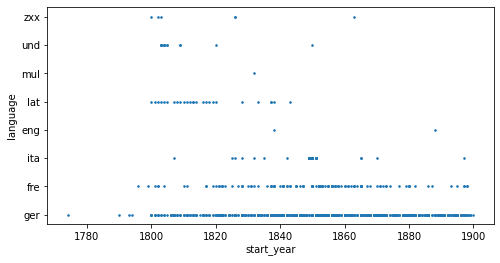

In [41]:
# Streudiagramm
ax = df.plot(x='start_year', y='language', kind='scatter', s=2.5, figsize=(8,4))

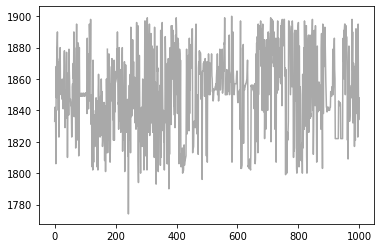

In [42]:
# eine numerische Variable plotten
ax = df.start_year.plot(color='darkgrey', figsize=(6,4))

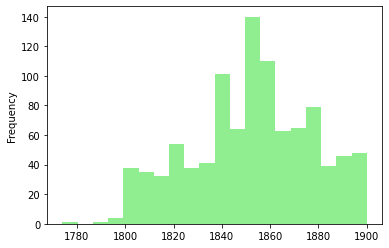

In [43]:
# Histogramm (hier: 10 Klassen/Intervalle)
ax = df.start_year.plot(kind='hist', bins=20, color='lightgreen')                                

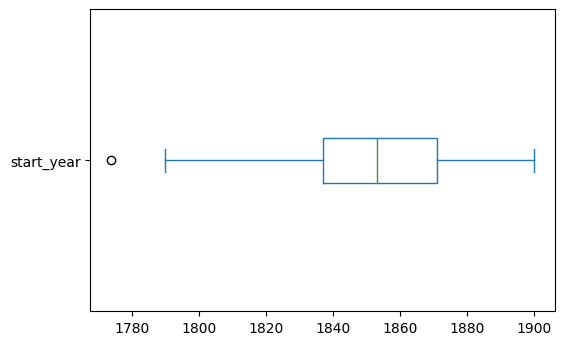

In [44]:
# Kasten-Diagramm (box whisker plot)
figure(dpi=100)
ax = df.start_year.plot(kind='box', vert=False)

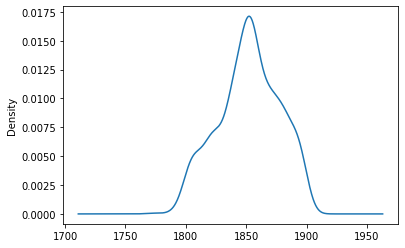

In [45]:
# Dichte-Diagramm
ax = df.start_year.plot(kind='density')

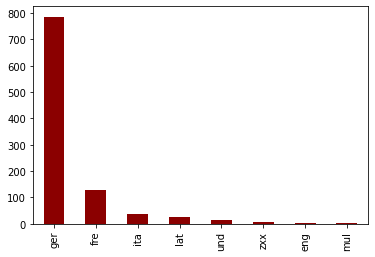

In [46]:
# Balkendiagramm für "language"
ax = df.language.value_counts().plot(kind='bar', color='darkred', figsize=(6,4))

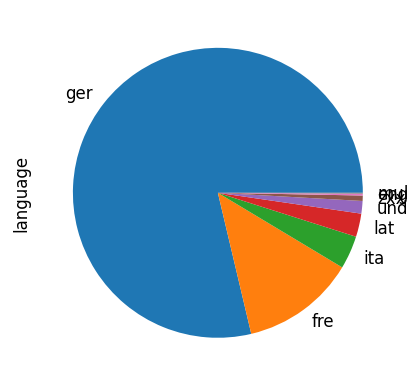

In [47]:
# Tortendiagramm
figure(dpi=120)
ax = df.language.value_counts().plot(kind='pie')    

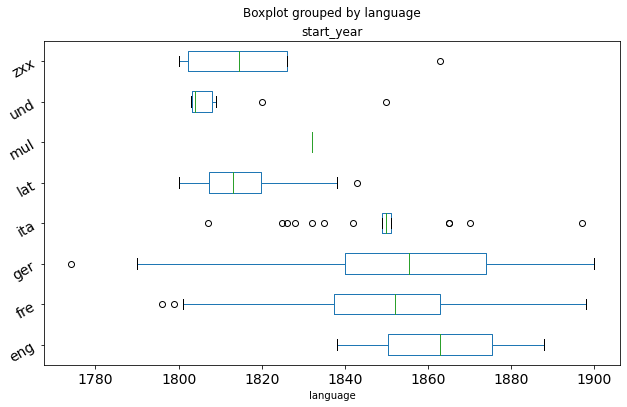

In [48]:
# Gruppiertes Kastendiagramm 
ax = df.boxplot(column='start_year', by='language', vert=False, grid=False, rot=30, fontsize=14, figsize=(10,6))

### Visualisierungen mit Seaborn

Siehe auch die umfangreiche Dokumentation von Seaborn: https://seaborn.pydata.org/index.html.

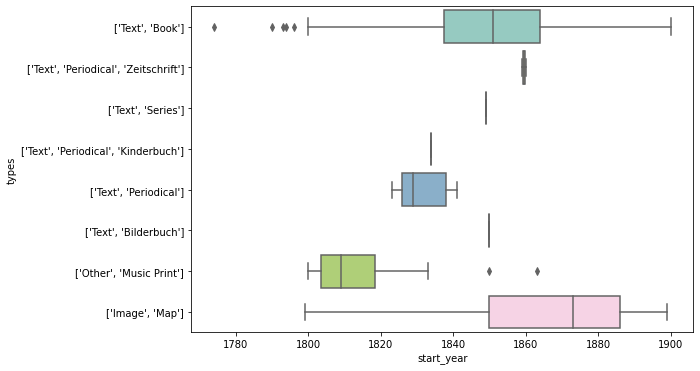

In [49]:
# Gruppiertes Kastendiagramm mit Seaborn
figure(figsize=(9, 6))
ax = sns.boxplot(y='types', x='start_year', data=df, orient='h', palette='Set3')

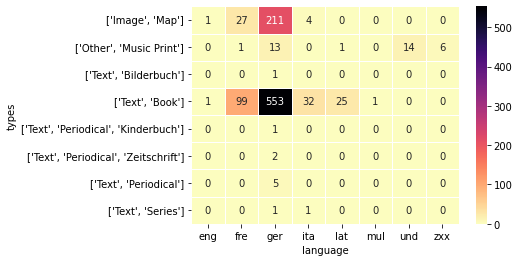

In [50]:
# Heatmap mit Seaborn: Types vs. Language
ct = pd.crosstab( df['types'], df['language'])
ax = sns.heatmap(ct, annot=True, fmt='d', cmap='magma_r', linewidths=.5)

### Visualisierungen mit Matplotlib

Zur umfangreichen Dokumentation von Matplotlib siehe hier: https://matplotlib.org/.

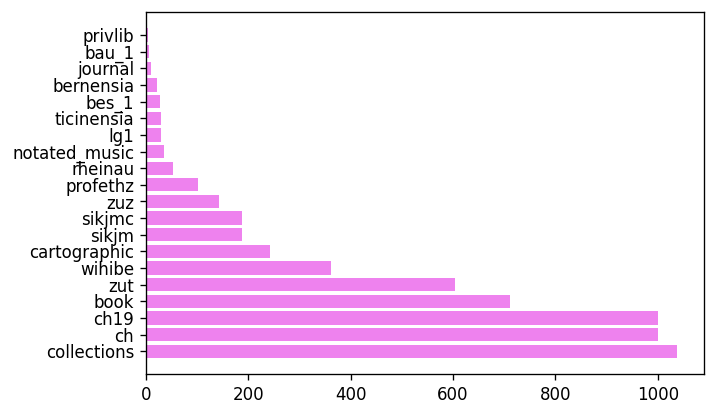

In [51]:
# Visualisierung von "sets_all"
counter = collections.Counter(sets_all)
sets = counter.most_common(20)
x, y = zip(*sets)

figure(dpi=120)
plt.barh(x, y, color='violet')
plt.show()

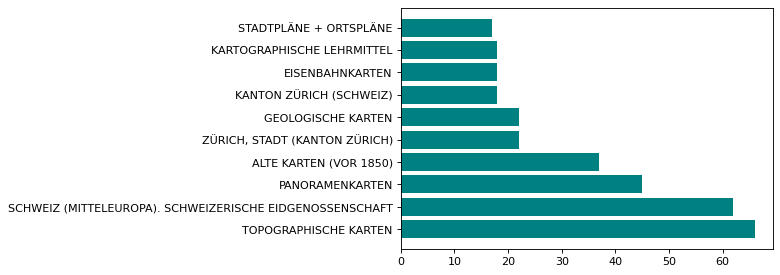

In [52]:
# Visualisierung von "subjects_all"
counter = collections.Counter(subjects_all)
subjects = counter.most_common(10)
x, y = zip(*subjects)

figure(dpi=80)
plt.barh(x, y, color='teal')
plt.show()

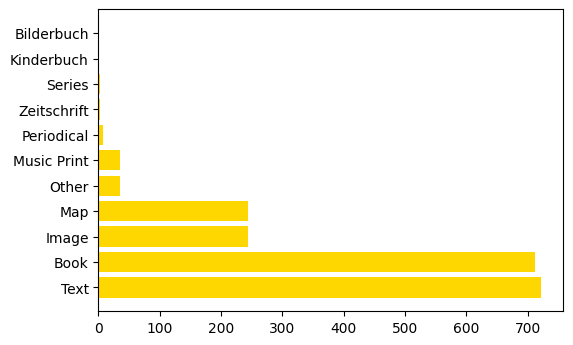

In [53]:
# Visualisierung von "types"
counter = collections.Counter(types_all)
types = counter.most_common(20)
x, y = zip(*types)

figure(dpi=100)
plt.barh(x, y, color='gold')
plt.show()